In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [19]:
#to import my data

In [20]:
df = pd.read_excel("covid_impact_on_airport_traffic.xlsx")

In [21]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,0,0,0,Daily,2020-04-03,1,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,1,1,1,Daily,2020-04-13,1,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,2,2,2,Daily,2020-07-10,1,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,3,3,3,Daily,2020-09-02,1,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,4,4,4,Daily,2020-10-31,1,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [22]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'AggregationMethod',
       'Date', 'Version', 'AirportName', 'PercentOfBaseline', 'Centroid',
       'City', 'State', 'ISO_3166_2', 'Country', 'Geography'],
      dtype='object')

In [25]:
#df=df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'],axis=1)

In [26]:
#to find out howmany airports are in dataset

In [27]:
len(df.AirportName.unique())

28

In [28]:
#to find out how many different countries

In [29]:
df.Country.unique()


array(['Australia', 'Chile', 'Canada', 'United States of America'],
      dtype=object)

In [30]:
#to remove (the) from the response

In [31]:
df["Country"] = df["Country"].replace("United States of America (the)","United States of America")

In [32]:
#to recall dataset with the new reponse

In [33]:
df.to_excel("covid_impact_on_airport_traffic.xlsx", index=False)

In [34]:
#to test Assumptions

In [35]:
#linearity

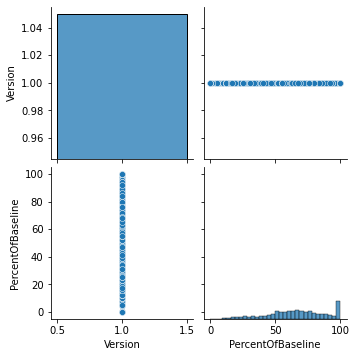

In [36]:
sns.pairplot(df)

In [39]:
df['Date'] = pd.to_datetime(df["Date"])

In [40]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek

In [41]:
df.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography,year,month,day,dayofweek
0,Daily,2020-04-03,1,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",2020,4,3,4
1,Daily,2020-04-13,1,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",2020,4,13,0
2,Daily,2020-07-10,1,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",2020,7,10,4
3,Daily,2020-09-02,1,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",2020,9,2,2
4,Daily,2020-10-31,1,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",2020,10,31,5


In [76]:
df_vars = df[["AirportName","PercentOfBaseline","State","Country","month","day","dayofweek"]]

In [77]:
#homoscedasticity

In [78]:
y = df_vars['PercentOfBaseline']
x = pd.get_dummies(df_vars.drop("PercentOfBaseline",axis=1))

In [79]:
model = sm.OLS(y,x).fit()

In [80]:
pred_val = model.fittedvalues.copy()
true_val = df['PercentOfBaseline'].values.copy()
residual = true_val - pred_val

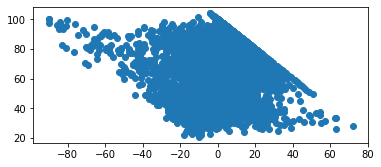

In [81]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

In [82]:
sms.diagnostic.het_breuschpagan(residual, df[['PercentOfBaseline']])

(534.8890635205354, nan, 577.4347579991991, 7.839828849711534e-123)

In [83]:
#sms.linear_harvey_collier(model)

(array([  17.,  174.,  294.,  386.,  646., 1089., 1353., 1105.,  855.,
        1328.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

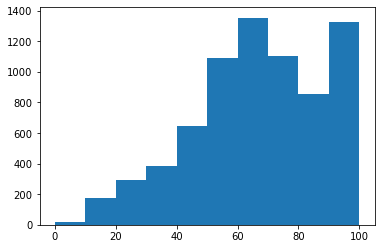

In [53]:
plt.hist(df["PercentOfBaseline"])

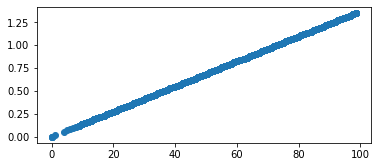

In [38]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

In [39]:
#Screening for Outliers

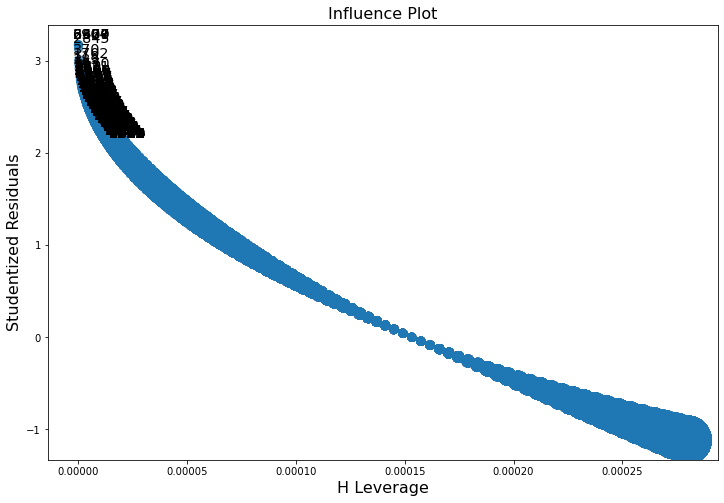

In [50]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion= "cooks")

In [57]:
#infl = model.get_influence()
#print(infl.summary_frame())

In [58]:
df_vars

,AirportName,PercentOfBaseline,State,Country,year,month,day,dayofweek
0,Kingsford Smith,64,New South Wales,Australia,2020,4,3,4
1,Kingsford Smith,29,New South Wales,Australia,2020,4,13,0
2,Kingsford Smith,54,New South Wales,Australia,2020,7,10,4
3,Kingsford Smith,18,New South Wales,Australia,2020,9,2,2
4,Kingsford Smith,22,New South Wales,Australia,2020,10,31,5
...,...,...,...,...,...,...,...,...
7242,Seattle-Tacoma International,80,Washington,United States of America,2020,6,5,4
7243,Seattle-Tacoma International,55,Washington,United States of America,2020,10,3,5
7244,Seattle-Tacoma International,76,Washington,United States of America,2020,7,16,3
7245,Seattle-Tacoma International,69,Washington,United States of America,2020,7,31,4


In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      PercentOfBaseline   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     336.3
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:01:15   Log-Likelihood:                -29558.
No. Observations:                7247   AIC:                         5.918e+04
Df Residuals:                    7216   BIC:                         5.939e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
year                                                      0.0265      0.000     77.217      0.000       0.026       0.027
month                                                     1.4944      0.068     21.989      0.000       1.361       1.628
day                                                       0.1436      0.019      7.529      0.000       0.106       0.181
dayofweek                                                -2.0966      0.085    -24.788      0.000      -2.262      -1.931
AirportName_Boston Logan International                    0.1965      0.428      0.459      0.647      -0.643       1.036
AirportName_Calgary International                        10.7654      0.664     16.211      0.000       9.464      12.067
AirportName_Charlotte Douglas International               5.5317      0.428     12.912      0.000       4.692       6.372
AirportName_Chicago OHare International                   4.3861      0.428     10.238      0.000       3.546       5.226
AirportName_Dallas/Fort Worth International               5.4766      0.428     12.807      0.000       4.638       6.315
AirportName_Daniel K. Inouye International               10.1582      0.428     23.712      0.000       9.318      10.998
AirportName_Denver International                         -4.1081      0.428     -9.589      0.000      -4.948      -3.268
AirportName_Detroit Metropolitan Wayne County            -8.4395      0.428    -19.700      0.000      -9.279      -7.600
AirportName_Edmonton International                       -5.2043      0.681     -7.637      0.000      -6.540      -3.868
AirportName_Halifax International                        -8.1550      0.414    -19.707      0.000      -8.966      -7.344
AirportName_Hamilton International                       16.9187      0.657     25.759      0.000      15.631      18.206
AirportName_Hartsfield-Jackson Atlanta International     -1.3173      0.428     -3.080      0.002      -2.156      -0.479
AirportName_John F. Kennedy International                 0.3007      0.658      0.457      0.648      -0.989       1.591
AirportName_Kingsford Smith                              -7.5984      0.263    -28.926      0.000      -8.113      -7.083
AirportName_LaGuardia                                    -1.8696      0.659     -2.838      0.005      -3.161      -0.578
AirportName_Los Angeles International                     9.6221      0.658     14.622      0.000       8.332      10.912
AirportName_McCarran International                      -13.0468      0.428    -30.454      0.000     -13.887     -12.207
AirportName_Miami International                           3.0854      0.428      7.202      0.000       2.246       3.925
AirportName_Montreal Mirabel     

In [124]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

In [113]:
x2 = pd.get_dummies(df_vars.drop(["State","PercentOfBaseline"],axis=1))

In [114]:
y2 = df_vars["PercentOfBaseline"] > 50

In [119]:
#x2.columns

In [116]:
logit = LogisticRegression(max_iter=100000)
logit.fit(x2,y2)

LogisticRegression(max_iter=100000)

In [117]:
pred = logit.predict(x2)
print(classification_report(y2,pred))

              precision    recall  f1-score   support

       False       0.74      0.58      0.65      1608
        True       0.89      0.94      0.91      5639

    accuracy                           0.86      7247
   macro avg       0.81      0.76      0.78      7247
weighted avg       0.85      0.86      0.85      7247



In [123]:
cross_val_score(logit,x2,y2, cv=KFold(3, shuffle=True))

array([0.87044702, 0.85637417, 0.84720497])

In [125]:
rf = RandomForestRegressor()
rf.fit(x,y)

RandomForestRegressor()

In [126]:
cross_val_score(rf,x,y,cv=KFold(3,shuffle=True))

array([0.81095366, 0.78724665, 0.78946104])

In [51]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats

<AxesSubplot:>

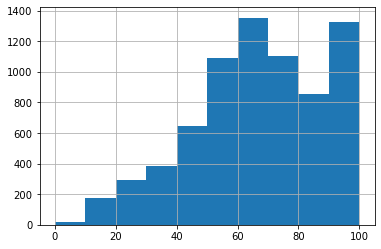

In [52]:
df['PercentOfBaseline'].hist()

In [57]:
stats.ttest_1samp(df['PercentOfBaseline'], 60)

Ttest_1sampResult(statistic=25.5815307592835, pvalue=2.9027726004146484e-138)

In [58]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind